Contained in this notebook is the code for producing the plot of the solution route for one vehicle. We first need to import necessary libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx

## Data Loading

In [5]:
#Import csv containing locations of each customer
coordinates = pd.read_csv('locations(1).csv')

#Import incidence matrix produced in AMPL
incidence = pd.read_csv('incidence_matrix(1).csv')

### Coordinates

In [6]:
#Rename coordinates for ease of use
coordinates.rename(columns = {"Unnamed: 0" : "label"}, inplace = True)

In [7]:
#Output coordinates
coordinates

,label,x,y
0,c1,-5.21,-0.36
1,c4,7.53,-6.28
2,c8,-1.80,-7.84
3,c11,3.09,6.42
4,c12,-2.94,2.94
5,c13,-4.59,5.66
6,c16,-5.74,5.79
7,c17,-7.41,-9.53
8,c21,9.52,-0.45
9,c23,-2.87,-1.24


### Incidence matrix

In [8]:
#Drop the index axis, since this is of no use for us
incidence_np = incidence.drop(":", axis = 1)

#Replace the arc running into d1 with 0 because otherwise we cannot topological sort
incidence_np['d1'].replace({1: 0}, inplace = True)

In [9]:
#Generate graph using incidence matrix
G = nx.DiGraph(incidence_np.values)

In [10]:
#Sort the graph topologically
ordered_nodes = [incidence_np.columns[i] for i in nx.topological_sort(G)]

In [11]:
#Put nodes into a dataframe for ease of use
ordered_nodes = pd.DataFrame(ordered_nodes)

#Append an ordering for ease of plotting
ordered_nodes['order'] = ordered_nodes.reset_index()['index']

In [12]:
#Rename column for ease of use
ordered_nodes.rename(columns = {0 : "label"}, inplace = True)

In [13]:
#Output nodes
ordered_nodes

,label,order
0,d1,0
1,c55,1
2,c35,2
3,c21,3
4,c4,4
5,c60,5
6,c44,6
7,c30,7
8,c36,8
9,c24,9


### Merge

In [14]:
#We now merge our dataframes
to_plot = pd.merge(coordinates, ordered_nodes, on='label')

In [15]:
#Sort it by the topological order
to_plot = to_plot.sort_values("order")

In [16]:
#Print our merged dataframe
to_plot

,label,x,y,order
24,d1,10.00,10.00,0
21,c55,4.59,5.14,1
12,c35,5.10,3.02,2
7,c21,9.52,-0.45,3
1,c4,7.53,-6.28,4
23,c60,7.29,-7.13,5
17,c44,2.86,-3.32,6
11,c30,2.80,-1.86,7
13,c36,-0.92,-4.84,8
9,c24,-1.37,-5.10,9


In [17]:
#Add back in d1 at the end, so we can plot
d1_return = {'label': 'd1', 'x': 10, 'y': 10, 'order' : len(to_plot)+1}
to_plot = to_plot.append(d1_return, ignore_index=True)

In [19]:
#Save this path for use in report
to_plot.to_csv("precise_path(1).csv")

## Plotting

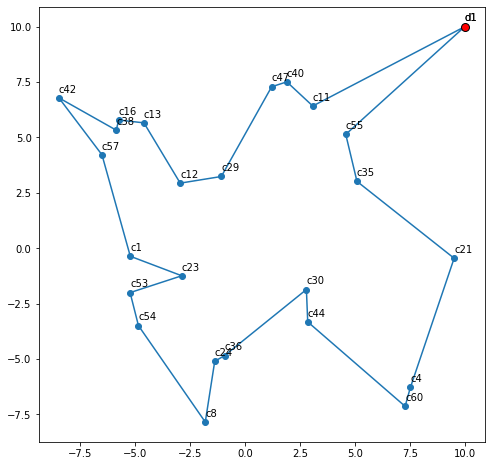

In [20]:
#Define plot
fig, ax = plt.subplots(figsize=(8, 8))

#Plot each x and y, and draw line between them 
ax.plot(to_plot.x, to_plot.y, "-o")

#Change colour of depot to red
ax.plot(to_plot["x"][0], to_plot["y"][0], marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')

#Iterate through rows of the to_plot dataframe
for i, label in enumerate(to_plot['label']):
    
    #Append a label at each node
    ax.text(to_plot['x'][i], to_plot['y'][i] +0.25, label)
    
#Save figure
plt.savefig('path_1.jpg')